# SOM

In [1]:
from numbasom import *

In [2]:
import numpy as np
data = np.random.random([200,3])

In [3]:
som = SOM(som_size=(50,50), is_torus=False)

In [4]:
lattice = som.train(data, num_iterations=15000)

SOM training took: 1.952066 seconds.


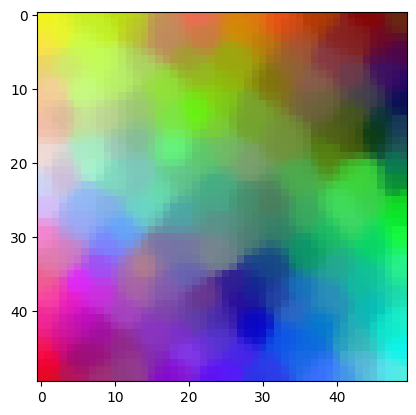

In [6]:
import matplotlib.pyplot as plt

plt.imshow(lattice)
plt.show()

In [7]:
um = u_matrix(lattice)

In [8]:
um.shape

(50, 50)

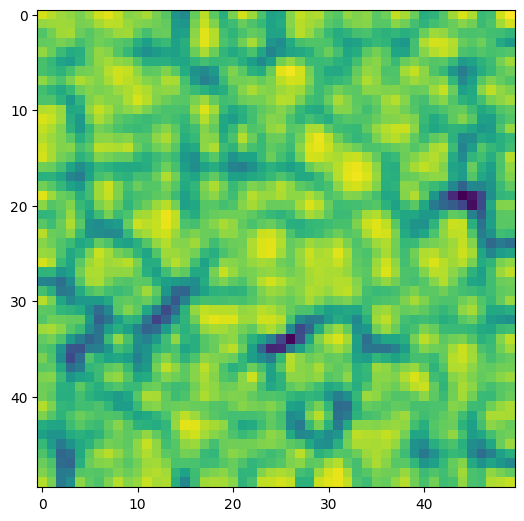

In [9]:
plot_u_matrix(um, fig_size=(6.2,6.2))

In [10]:
colors = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.],[1.,1.,0.],[0.,1.,1.],[1.,0.,1.],[0.,0.,0.],[1.,1.,1.]])
color_labels = ['red', 'green', 'blue', 'yellow', 'cyan', 'purple','black', 'white']

In [11]:
projection = project_on_lattice(colors, lattice, additional_list=color_labels)

for p in projection:
    if projection[p]:
        print (p, projection[p][0])

Projecting on SOM took: 0.346581 seconds.
(0, 0) yellow
(16, 45) black
(19, 0) white
(27, 49) green
(37, 5) purple
(44, 29) blue
(45, 49) cyan
(49, 0) red


In [12]:
closest = lattice_closest_vectors(colors, lattice, additional_list=color_labels)

Finding closest data points took: 0.127542 seconds.


In [13]:
closest[(1,1)]

['yellow']

In [14]:
closest_vec = lattice_closest_vectors(colors, lattice)

Finding closest data points took: 0.003187 seconds.


In [17]:
values = np.array(list(closest_vec.values())).reshape(50,50,-1)
values

array([[[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]]])

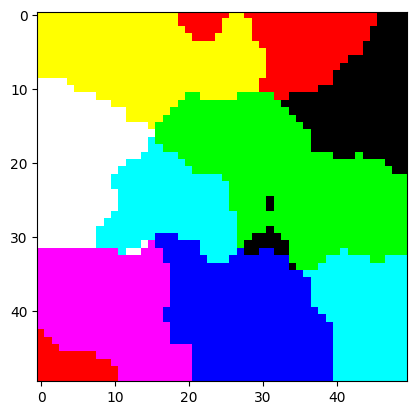

In [18]:
plt.imshow(values)
plt.show()

In [19]:
activations = lattice_activations(colors, lattice)

Computing SOM activations took: 0.374525 seconds.


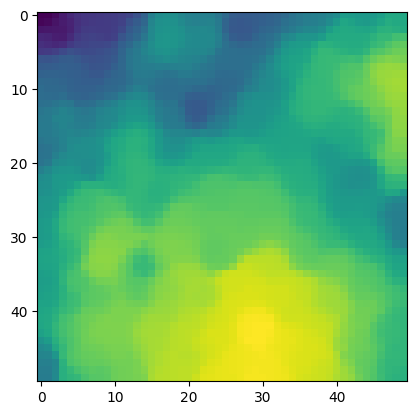

In [20]:
plt.imshow(activations[2])
plt.show()

In [21]:
activations = lattice_activations(colors, lattice, exponent=8)

Computing SOM activations took: 0.001178 seconds.


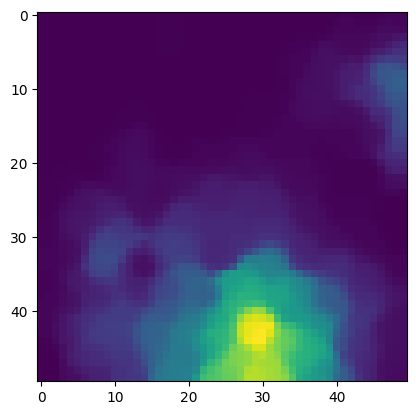

In [22]:
plt.imshow(activations[2])
plt.show()

# KMeans

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import random
import folium as fl
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import os
from PIL import Image, ImageDraw, ImageFilter

In [2]:
path = '/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/'
filen = 'world_history_bioclim_allLatLon_upd.npy'
cl_data = np.load(path+filen, allow_pickle=True)

In [3]:
cl_data.shape

(121, 67420, 22)

In [4]:
dd = pd.DataFrame(cl_data[120])
dd.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,120,12,284,-18.84000015258789,7.619999885559082,0.18000000715255737,12.640000343322754,5.900000095367432,-37.099998474121094,42.29999923706055,...,-4.170000076293945,-31.670000076293945,10.0,6.0,0.0,222.05999755859375,10.0,0.0,10.0,0.0
1,120,12,285,-18.809999465942383,7.619999885559082,0.18000000715255737,12.649999618530273,5.900000095367432,-36.900001525878906,42.29999923706055,...,-4.070000171661377,-31.600000381469727,10.0,6.0,0.0,222.05999755859375,10.0,0.0,10.0,0.0
2,120,12,286,-19.399999618530273,8.029999732971191,0.1899999976158142,13.079999923706055,5.599999904632568,-37.79999923706055,43.0,...,-3.8299999237060547,-32.70000076293945,1.2000000476837158,0.10000000149011612,0.10000000149011612,0.0,0.30000001192092896,0.30000001192092896,0.30000001192092896,0.30000001192092896
3,120,12,287,-19.06999969482422,8.020000457763672,0.1899999976158142,13.069999694824219,5.800000190734863,-37.400001525878906,42.900001525878906,...,-3.5,-32.33000183105469,1.2000000476837158,0.10000000149011612,0.10000000149011612,0.0,0.30000001192092896,0.30000001192092896,0.30000001192092896,0.30000001192092896
4,120,12,288,-19.81999969482422,8.010000228881836,0.18000000715255737,13.149999618530273,5.300000190734863,-38.099998474121094,43.400001525878906,...,-4.130000114440918,-33.099998474121094,1.2000000476837158,0.10000000149011612,0.10000000149011612,0.0,0.30000001192092896,0.30000001192092896,0.30000001192092896,0.30000001192092896


In [5]:
dd = dd.astype(float)
dd.dropna(inplace=True)
dd.reset_index(inplace=True, drop=True)
sel_data = dd.iloc[:,3:]

## Train / Model - one year

In [276]:
# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sel_data)
# Initialize K-Means
num_clusters = 100
kmeans = KMeans(
    init="random",
    n_clusters=num_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [277]:
%%time
kmeans.fit(scaled_data)

CPU times: user 53.7 s, sys: 1.72 s, total: 55.4 s
Wall time: 3.65 s


KMeans(init='random', n_clusters=100, random_state=42)

In [278]:
dd['Cluster_No'] = kmeans.labels_

In [279]:
sel_data.head()

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-20.191668,7.716667,0.182427,42.299999,-39.100002,12.749866,3.6,0.0,10.0,0.0,222.056488,-33.766666,-6.100000,10.0,6.0,10.0,0.0,-6.100000,-33.766666
1,-20.174999,7.708333,0.182230,42.299999,-39.200001,12.782353,3.6,0.0,10.0,0.0,222.056488,-33.733334,-5.966667,10.0,6.0,10.0,0.0,-5.966667,-33.733334
2,-20.766668,8.125000,0.188953,43.000000,-40.700001,13.210182,3.3,0.3,0.3,0.1,0.000016,-34.799999,-5.733334,1.2,0.1,0.3,0.3,-5.733334,-34.799999
3,-20.483334,8.116666,0.189200,42.900002,-40.400002,13.226416,3.6,0.3,0.3,0.1,0.000016,-34.500000,-5.400000,1.2,0.1,0.3,0.3,-5.400000,-34.500000
4,-21.241667,8.108334,0.186828,43.400002,-41.299999,13.338007,3.0,0.3,0.3,0.1,0.000016,-35.333332,-6.000000,1.2,0.1,0.3,0.3,-6.000000,-35.333332


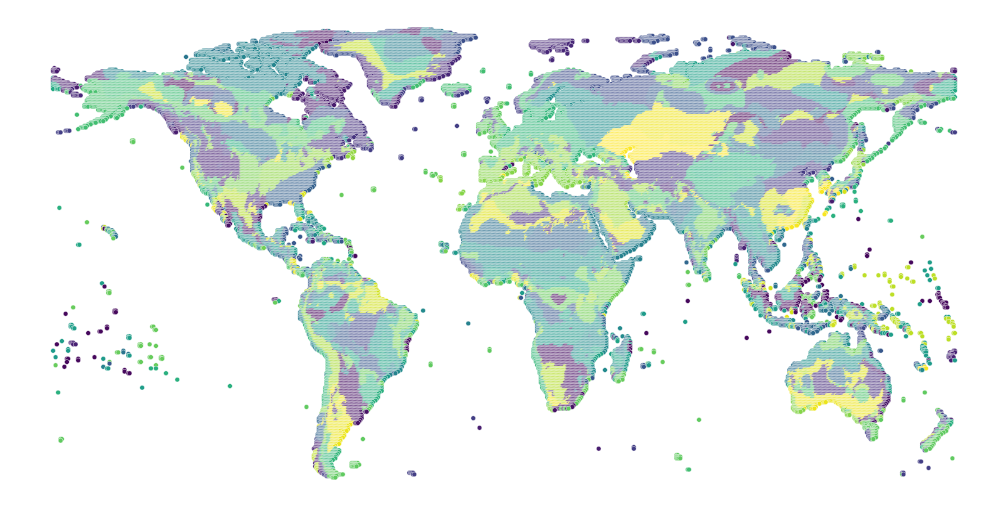

In [280]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=dd,  x=2, y=1, hue='Cluster_No', legend=False, palette="viridis", size=0.01)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

### Project

In [262]:
filename = 'data_inkl_bioclim_grs.csv'
df = pd.read_csv(path+filename)

In [263]:
samples = df.sample(n = 5)

In [264]:
samples

,Unnamed: 0,index,gbifID,datasetKey,kingdom,phylum,class,order,family,genus,...,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19
73873,74684,75712,1259064780,7bd65a7a-f762-11e1-a439-00145eb45e9a,Plantae,Tracheophyta,Liliopsida,Alismatales,Araceae,Anthurium,...,8.1,107.164299,21.233335,24.866669,786.600037,241.900009,96.700005,128.199997,23.233332,22.566668
224307,229871,233158,2515716123,15f819bd-6612-4447-854b-14d12ee1022d,Plantae,Tracheophyta,Magnoliopsida,Santalales,Loranthaceae,Lepeostegeres,...,228.5,26.354450,26.200003,27.533333,3662.599854,335.500000,873.500000,907.100037,26.200003,27.533333
228170,233763,237080,1259062958,7bd65a7a-f762-11e1-a439-00145eb45e9a,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Scrophulariaceae,Buddleja,...,2.7,94.442520,8.900001,13.500000,492.700012,123.599998,133.100006,55.100002,13.300000,9.433333
189844,194377,197188,686824512,dce00a1f-f6b4-4e11-9771-92c62c40ad80,Animalia,Chordata,Amphibia,Anura,Leptodactylidae,Engystomops,...,14.0,56.585278,15.333333,15.333333,1482.400024,189.800003,206.300003,387.500000,15.366668,15.566667
10359,10503,10665,2513355231,15f819bd-6612-4447-854b-14d12ee1022d,Plantae,Tracheophyta,Magnoliopsida,Apiales,Araliaceae,Aralia,...,30.5,77.447578,26.100000,26.100000,2320.499756,482.899994,618.400024,119.900002,25.666666,26.100000


In [265]:
sel_pred_sc = scaler.transform(samples.iloc[:, 19:].values)
kmeans.predict(sel_pred_sc)

array([5, 8, 0, 5, 3], dtype=int32)

## Train / Model - history

In [6]:
cl_data.shape

(121, 67420, 22)

In [7]:
cl_data_fl = cl_data.reshape(-1, cl_data.shape[-1])

In [8]:
cl_data_fl.shape

(8157820, 22)

In [9]:
dd = pd.DataFrame(cl_data_fl)
dd.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0,12,284,-20.191667556762695,7.716667175292969,0.18000000715255737,12.75,3.5999999046325684,-39.099998474121094,42.29999923706055,...,-6.099999904632568,-33.77000045776367,10.0,6.0,0.0,222.05999755859375,10.0,0.0,10.0,0.0
1,0,12,285,-20.174999237060547,7.708333492279053,0.18000000715255737,12.779999732971191,3.5999999046325684,-39.20000076293945,42.29999923706055,...,-5.96999979019165,-33.72999954223633,10.0,6.0,0.0,222.05999755859375,10.0,0.0,10.0,0.0
2,0,12,286,-20.76666831970215,8.125,0.1899999976158142,13.210000038146973,3.299999952316284,-40.70000076293945,43.0,...,-5.730000019073486,-34.79999923706055,1.2000000476837158,0.10000000149011612,0.10000000149011612,0.0,0.30000001192092896,0.30000001192092896,0.30000001192092896,0.30000001192092896
3,0,12,287,-20.483333587646484,8.116665840148926,0.1899999976158142,13.229999542236328,3.5999999046325684,-40.400001525878906,42.900001525878906,...,-5.400000095367432,-34.5,1.2000000476837158,0.10000000149011612,0.10000000149011612,0.0,0.30000001192092896,0.30000001192092896,0.30000001192092896,0.30000001192092896
4,0,12,288,-21.241666793823242,8.108333587646484,0.1899999976158142,13.34000015258789,3.0,-41.29999923706055,43.400001525878906,...,-6.0,-35.33000183105469,1.2000000476837158,0.10000000149011612,0.10000000149011612,0.0,0.30000001192092896,0.30000001192092896,0.30000001192092896,0.30000001192092896


In [10]:
dd = dd.astype(float)
dd.dropna(inplace=True)
dd.reset_index(inplace=True, drop=True)
sel_data = dd.iloc[:,3:]

In [11]:
sel_data.iloc[:,:].max()

3        32.090000
4        22.180000
5         1.140000
6        25.150000
7        48.299999
8        25.799999
9        72.599998
10       37.099998
11       37.970001
12       37.970001
13       31.070000
14    10704.500000
15     4061.199951
16     1398.699951
17      346.410004
18     5353.600098
19     3440.899902
20     5353.600098
21     5186.200195
dtype: float64

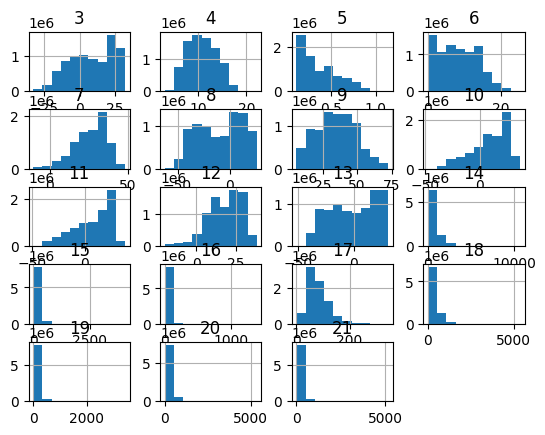

In [13]:
sel_data.hist();

In [144]:
# Scaling
scaler = RobustScaler()
scaler.fit(sel_data)
scaled_data = scaler.transform(sel_data)
# Initialize K-Means
num_clusters = 100
kmeans = KMeans(
    init="random",
    n_clusters=num_clusters,
    n_init=10,
    max_iter=300,
    random_state=42, 
    verbose=1
)

In [ ]:
%%time
kmeans.fit(scaled_data)

Initialization complete
Iteration 0, inertia 24351263.020179622.
Iteration 1, inertia 17634674.718351632.
Iteration 2, inertia 16352253.68880362.
Iteration 3, inertia 15644324.705101818.
Iteration 4, inertia 15168153.476754738.
Iteration 5, inertia 14838529.273288904.
Iteration 6, inertia 14613246.008307572.
Iteration 7, inertia 14449292.151015924.
Iteration 8, inertia 14320868.367829248.
Iteration 9, inertia 14215447.443442518.
Iteration 10, inertia 14127644.629388638.
Iteration 11, inertia 14052719.12936732.
Iteration 12, inertia 13985177.249668252.
Iteration 13, inertia 13921855.600954788.
Iteration 14, inertia 13864617.248463044.
Iteration 15, inertia 13810603.414819993.
Iteration 16, inertia 13760323.057937365.
Iteration 17, inertia 13709692.190117236.
Iteration 18, inertia 13655030.649308631.
Iteration 19, inertia 13592578.808046898.
Iteration 20, inertia 13528308.508922786.
Iteration 21, inertia 13470071.0226026.
Iteration 22, inertia 13419828.421630118.
Iteration 23, inertia 13

Iteration 194, inertia 12383474.281693025.
Iteration 195, inertia 12382017.55175405.
Iteration 196, inertia 12380502.270836713.
Iteration 197, inertia 12378932.259214468.
Iteration 198, inertia 12377292.753932243.
Iteration 199, inertia 12375607.281871522.
Iteration 200, inertia 12374011.952035777.
Iteration 201, inertia 12372533.045860909.
Iteration 202, inertia 12371098.808309041.
Iteration 203, inertia 12369750.522454103.
Iteration 204, inertia 12368437.706518268.
Iteration 205, inertia 12367146.70400096.
Iteration 206, inertia 12365867.390710339.
Iteration 207, inertia 12364528.542129233.
Iteration 208, inertia 12363150.322558938.
Iteration 209, inertia 12361750.352921564.
Iteration 210, inertia 12360291.307289526.
Iteration 211, inertia 12358779.96287762.
Iteration 212, inertia 12357162.352471981.
Iteration 213, inertia 12355384.359498452.
Iteration 214, inertia 12353378.007803077.
Iteration 215, inertia 12350915.822512534.
Iteration 216, inertia 12347679.07862188.
Iteration 217, 

Iteration 88, inertia 12261357.874454267.
Iteration 89, inertia 12256503.686572935.
Iteration 90, inertia 12251996.571190719.
Iteration 91, inertia 12247925.264700647.
Iteration 92, inertia 12244133.871128306.
Iteration 93, inertia 12240603.20618153.
Iteration 94, inertia 12237569.97018899.
Iteration 95, inertia 12234990.26296907.
Iteration 96, inertia 12232462.18479456.
Iteration 97, inertia 12230198.355063897.
Iteration 98, inertia 12228117.072772145.
Iteration 99, inertia 12226219.02827537.
Iteration 100, inertia 12224457.12303112.
Iteration 101, inertia 12222810.099034246.
Iteration 102, inertia 12221310.774379645.
Iteration 103, inertia 12219998.798805252.
Iteration 104, inertia 12218793.702480525.
Iteration 105, inertia 12217675.947787171.
Iteration 106, inertia 12216596.140550077.
Iteration 107, inertia 12215541.659985801.
Iteration 108, inertia 12214471.84853274.
Iteration 109, inertia 12213398.999975171.
Iteration 110, inertia 12212303.728778439.
Iteration 111, inertia 1221115

Iteration 280, inertia 12128413.429864146.
Iteration 281, inertia 12128354.803102266.
Iteration 282, inertia 12128292.055351242.
Iteration 283, inertia 12128222.533681985.
Iteration 284, inertia 12128151.99802526.
Iteration 285, inertia 12128079.365597572.
Iteration 286, inertia 12128003.939192832.
Iteration 287, inertia 12127925.97999464.
Iteration 288, inertia 12127841.888245393.
Iteration 289, inertia 12127748.555593442.
Iteration 290, inertia 12127652.434959771.
Iteration 291, inertia 12127553.081486786.
Iteration 292, inertia 12127448.71970573.
Iteration 293, inertia 12127341.964638727.
Iteration 294, inertia 12127231.387084205.
Iteration 295, inertia 12127113.5653884.
Iteration 296, inertia 12126988.258080184.
Iteration 297, inertia 12126858.704955863.
Iteration 298, inertia 12126722.091822688.
Iteration 299, inertia 12126578.258078141.
Initialization complete
Iteration 0, inertia 26827601.60297386.
Iteration 1, inertia 18245996.388633024.
Iteration 2, inertia 16103402.164387088.

Iteration 174, inertia 12151664.710518714.
Iteration 175, inertia 12151397.74848576.
Iteration 176, inertia 12151177.894756515.
Iteration 177, inertia 12150973.297019187.
Iteration 178, inertia 12150788.183772642.
Iteration 179, inertia 12150623.476790596.
Iteration 180, inertia 12150470.97646855.
Iteration 181, inertia 12150336.73232115.


In [61]:
## Save
filename = '/Users/davidschildberger/code/dadavie/planetary_garden/models/model_hist_clim.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [21]:
## Load
filename = '/Users/davidschildberger/code/dadavie/planetary_garden/models/model_hist_clim.sav'
kmeans = pickle.load(open(filename, 'rb'))

In [62]:
dd['Cluster_No'] = kmeans.labels_

In [63]:
dd.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,Cluster_No
0,0.0,12.0,284.0,-20.191668,7.716667,0.18,12.75,3.6,-39.099998,42.299999,...,-33.770000,10.0,6.0,0.0,222.059998,10.0,0.0,10.0,0.0,27
1,0.0,12.0,285.0,-20.174999,7.708333,0.18,12.78,3.6,-39.200001,42.299999,...,-33.730000,10.0,6.0,0.0,222.059998,10.0,0.0,10.0,0.0,27
2,0.0,12.0,286.0,-20.766668,8.125000,0.19,13.21,3.3,-40.700001,43.000000,...,-34.799999,1.2,0.1,0.1,0.000000,0.3,0.3,0.3,0.3,76
3,0.0,12.0,287.0,-20.483334,8.116666,0.19,13.23,3.6,-40.400002,42.900002,...,-34.500000,1.2,0.1,0.1,0.000000,0.3,0.3,0.3,0.3,76
4,0.0,12.0,288.0,-21.241667,8.108334,0.19,13.34,3.0,-41.299999,43.400002,...,-35.330002,1.2,0.1,0.1,0.000000,0.3,0.3,0.3,0.3,76


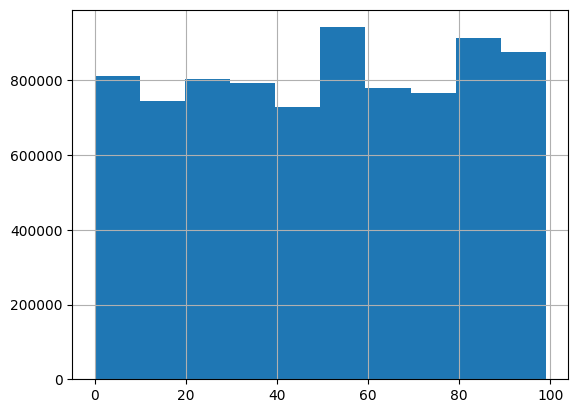

In [64]:
dd['Cluster_No'].hist();

## Project - Species

In [49]:
filename = 'data_inkl_bioclim_upd.csv'
df = pd.read_csv(path+filename)

In [50]:
df.head()

,Unnamed: 0,index,gbifID,datasetKey,kingdom,phylum,class,order,family,genus,...,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19
0,0,0,1807713417,2f676abc-4503-489e-8f0c-fcb6e1bc554b,Animalia,Arthropoda,Insecta,Coleoptera,Curculionidae,Andranthobius,...,27.93,27.93,1827.800049,440.5,1.5,93.699997,1051.099976,47.5,47.5,47.5
1,1,1,1807713566,2f676abc-4503-489e-8f0c-fcb6e1bc554b,Animalia,Arthropoda,Insecta,Coleoptera,Curculionidae,Andranthobius,...,27.93,27.93,1827.800049,440.5,1.5,93.699997,1051.099976,47.5,47.5,47.5
2,2,2,1807713573,2f676abc-4503-489e-8f0c-fcb6e1bc554b,Animalia,Arthropoda,Insecta,Coleoptera,Curculionidae,Andranthobius,...,27.93,27.93,1827.800049,440.5,1.5,93.699997,1051.099976,47.5,47.5,47.5
3,3,3,1807713712,2f676abc-4503-489e-8f0c-fcb6e1bc554b,Animalia,Arthropoda,Insecta,Coleoptera,Curculionidae,Andranthobius,...,27.93,27.93,1827.800049,440.5,1.5,93.699997,1051.099976,47.5,47.5,47.5
4,4,4,1807713469,2f676abc-4503-489e-8f0c-fcb6e1bc554b,Animalia,Arthropoda,Insecta,Coleoptera,Curculionidae,Andranthobius,...,27.93,27.93,1827.800049,440.5,1.5,93.699997,1051.099976,47.5,47.5,47.5


In [51]:
df.iloc[:,19:].describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19
count,263512.000000,263512.000000,263512.000000,263512.000000,263512.000000,263512.000000,263512.000000,263512.000000,263512.000000,263512.000000,263512.000000,263512.000000,263512.000000,263512.000000,263506.000000,263512.000000,263512.000000,263512.000000,263512.000000
mean,20.468534,10.703246,0.629994,2.616164,29.895701,10.953061,18.998201,20.844245,20.252815,23.369849,17.696032,1647.339914,274.121942,42.702105,72.270086,624.923322,212.601457,440.542683,294.468516
std,6.383115,2.862269,0.176651,2.660340,4.394666,10.129369,9.039937,7.362849,6.865619,4.697796,8.833700,1028.063266,168.355885,55.743550,32.947314,374.603005,211.705486,307.807033,305.810845
min,-31.441666,3.200000,0.130000,0.130000,-8.700000,-53.200001,6.500000,-45.200001,-39.669998,-19.200001,-45.200001,0.000000,0.000000,0.000000,6.280000,0.000000,0.000000,0.000000,0.000000
25%,17.216669,8.370000,0.500000,0.650000,28.100000,4.800000,12.100000,18.629999,17.330000,21.100000,13.230000,844.099976,147.899994,3.700000,49.040001,324.000000,51.700001,203.000000,80.599998
50%,22.450001,10.283333,0.660000,1.390000,30.799999,14.200000,16.000000,23.799999,22.070000,24.830000,20.570000,1464.900024,251.600006,22.975000,66.389999,579.700012,156.000000,390.899994,183.800003
75%,25.383333,12.670000,0.770000,3.840000,32.400002,19.000000,23.900000,25.900000,25.200001,26.629999,24.430000,2353.600098,370.700012,58.500000,92.209999,891.299988,304.700012,624.099976,402.200012
max,31.175000,21.900000,1.070000,20.879999,46.099998,25.400000,69.900002,35.330002,37.570000,37.570000,29.600000,8666.700195,2210.600098,1398.699951,321.929993,3994.699951,2447.500000,3721.399902,3204.300049


In [72]:
samples = df.sample(n = 5)

In [80]:
samples.iloc[3]

Unnamed: 0                                                             6152
index                                                                  6248
gbifID                                                           1930516458
datasetKey                             d415c253-4d61-4459-9d25-4015b9084fb0
kingdom                                                             Plantae
phylum                                                         Tracheophyta
class                                                            Liliopsida
order                                                           Asparagales
family                                                          Orchidaceae
genus                                                             Lepanthes
species                                               Lepanthes rubripetala
scientificName                                Lepanthes rubripetala Stimson
verbatimScientificName                        Lepanthes rubripetala Stimson
countryCode 

In [81]:
sel_pred_sc = scaler.transform(samples.iloc[:, 19:].values)
kmeans.predict(sel_pred_sc)

array([16, 74, 79, 37, 22], dtype=int32)

In [82]:
dd_sel = dd[dd['Cluster_No']==37]
dd_sel

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,Cluster_No
44083,0.0,132.0,209.0,24.000000,6.316667,0.45,2.68,30.700001,17.700001,14.000000,...,21.230000,1045.199951,225.500000,26.000000,81.070000,284.600006,74.400002,284.600006,74.400002,37
44363,0.0,133.0,209.0,24.208330,6.166667,0.47,2.59,30.799999,18.200001,13.000000,...,21.570000,961.000000,206.800003,27.200001,72.790001,251.100006,84.300003,251.100006,84.300003,37
44364,0.0,133.0,210.0,24.291666,6.066667,0.47,2.54,30.700001,18.400000,12.800000,...,21.700001,925.000000,198.800003,28.600000,67.370003,235.699997,94.900002,235.699997,94.900002,37
44644,0.0,134.0,211.0,24.808334,5.991667,0.50,2.30,31.000000,19.400000,12.000000,...,22.400000,858.900024,154.000000,23.600000,57.419998,254.699997,83.800003,254.699997,83.800003,37
44645,0.0,134.0,212.0,24.933334,6.008333,0.50,2.18,31.000000,19.500000,11.900000,...,22.629999,840.599976,145.199997,26.900000,53.639999,247.000000,89.400002,247.000000,89.400002,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8155571,120.0,247.0,407.0,15.460000,11.330000,0.58,3.07,25.600000,3.800000,19.600000,...,11.670000,810.299988,144.899994,11.000000,56.150002,331.899994,93.000000,159.100006,226.300003,37
8155573,120.0,247.0,409.0,17.100000,11.300000,0.58,2.86,26.600000,5.200000,19.600000,...,13.570000,570.299988,89.699997,15.800000,44.500000,215.699997,81.099998,113.699997,159.800003,37
8155576,120.0,247.0,412.0,18.680000,11.760000,0.61,2.64,28.000000,6.400000,19.299999,...,15.470000,562.599976,78.699997,14.200000,58.389999,212.600006,76.599998,103.699997,169.699997,37
8155577,120.0,247.0,413.0,19.120001,10.270000,0.60,2.37,27.299999,8.100000,17.200001,...,16.200001,611.099976,85.000000,13.900000,65.190002,229.199997,80.300003,122.199997,179.399994,37


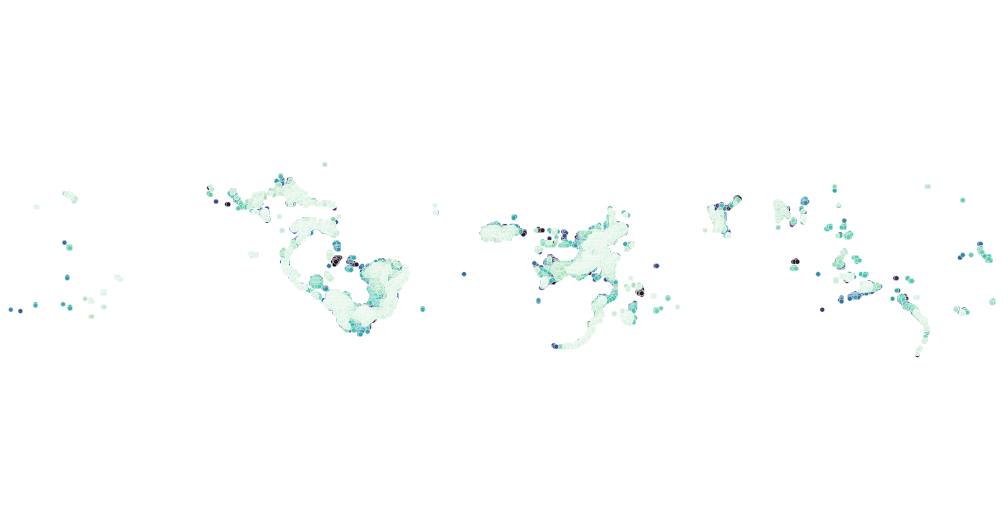

In [83]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=dd_sel,  x=2, y=1, hue=0, legend=False, palette="mako", size=0.01)
g.axis(xmin=0,xmax=720)
g.axis(ymin=0,ymax=360)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

## Project - climate

In [31]:
path = '/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/'
filename = 'overall_future_clim_allLatLon_upd.npy'
cl_fut = np.load(path+filename, allow_pickle=True)

In [140]:
pr_df = pd.DataFrame(cl_fut[2])
pr_df = pr_df.astype(float)
pr_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,84264.0,84264.000000,84264.000000,84264.000000,84264.000000,84264.000000,84264.000000,84264.000000,84264.000000,84264.000000,...,84264.000000,84264.000000,84264.000000,84264.000000,84264.000000,84264.000000,84264.000000,84264.000000,84264.000000,84264.000000
mean,2.0,177.000368,396.985011,-1.436297,10.152649,34.288980,868.723424,16.693434,-17.148657,33.842090,...,9.744776,-11.130442,565.235206,100.168441,14.783075,77.478325,255.360061,53.949302,158.389578,114.700540
std,0.0,115.530177,175.597944,24.839599,3.157281,17.942335,437.220226,22.484350,25.796975,11.497728,...,21.815761,26.568013,661.750270,113.778277,27.350688,44.867500,299.693248,92.047068,190.555459,200.566664
min,2.0,12.000000,0.000000,-52.000000,0.000000,-0.000000,14.800000,-27.900000,-70.100000,3.200000,...,-36.000000,-63.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.0,75.000000,236.000000,-21.800000,7.600000,21.600000,597.475000,-5.700000,-36.800000,26.700000,...,-10.400000,-31.500000,108.075000,29.300000,0.000000,42.900000,56.400000,1.000000,5.500000,16.300000
50%,2.0,141.000000,417.000000,3.100000,9.600000,26.700000,899.300000,25.900000,-17.400000,33.400000,...,17.700000,-11.000000,358.400000,64.000000,4.400000,67.700000,161.200000,22.000000,114.200000,48.700000
75%,2.0,323.000000,547.000000,21.400000,12.600000,44.200000,1164.500000,34.500000,6.400000,40.800000,...,27.600000,14.200000,712.800000,119.600000,18.300000,104.500000,311.600000,66.800000,229.500000,117.100000
max,2.0,358.000000,719.000000,33.400000,20.800000,94.100000,2305.100000,51.200000,26.100000,71.300000,...,41.300000,31.100000,8008.800000,2444.200000,525.800000,229.200000,5639.500000,1712.500000,4459.800000,5305.600000


In [141]:
pr_df = pr_df.sample(n = 5)
pr_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
29306,2.0,96.0,409.0,12.5,9.9,33.1,746.0,28.7,-1.1,29.8,...,21.8,3.7,652.4,70.6,29.1,25.7,197.8,102.7,142.3,186.9
59321,2.0,246.0,251.0,18.2,10.6,46.6,445.3,30.2,7.5,22.7,...,23.7,12.8,1389.1,148.5,90.6,14.4,398.2,294.0,354.1,398.2
26733,2.0,89.0,153.0,11.1,14.9,31.6,1179.6,36.6,-10.7,47.3,...,25.6,-3.0,710.0,98.6,35.2,36.3,274.1,114.5,215.8,114.5
43158,2.0,145.0,520.0,30.8,10.3,44.5,343.7,42.9,19.8,23.1,...,35.5,26.5,1042.6,252.7,2.6,103.8,647.1,15.8,195.1,48.7
80543,2.0,353.0,599.0,-44.1,7.3,19.5,1167.8,-21.0,-58.5,37.5,...,-27.6,-54.2,6.8,6.8,0.0,125.3,6.8,0.0,0.0,6.8


In [142]:
fcl_sam = pr_df.iloc[:,3:]

In [143]:
sel_pred_cl = scaler.transform(fcl_sam.values)
kmeans.predict(sel_pred_cl)

array([97, 77, 97, 77, 97], dtype=int32)

In [134]:
cl_sel = dd[dd['Cluster_No']==77]

/var/folders/jj/6lhmrlt15xs297nzzcs7734w0000gn/T/ipykernel_12276/775013716.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = seaborn.scatterplot(data=cl_sel,  x=2, y=1,legend=False, palette="mako", size=0.01)


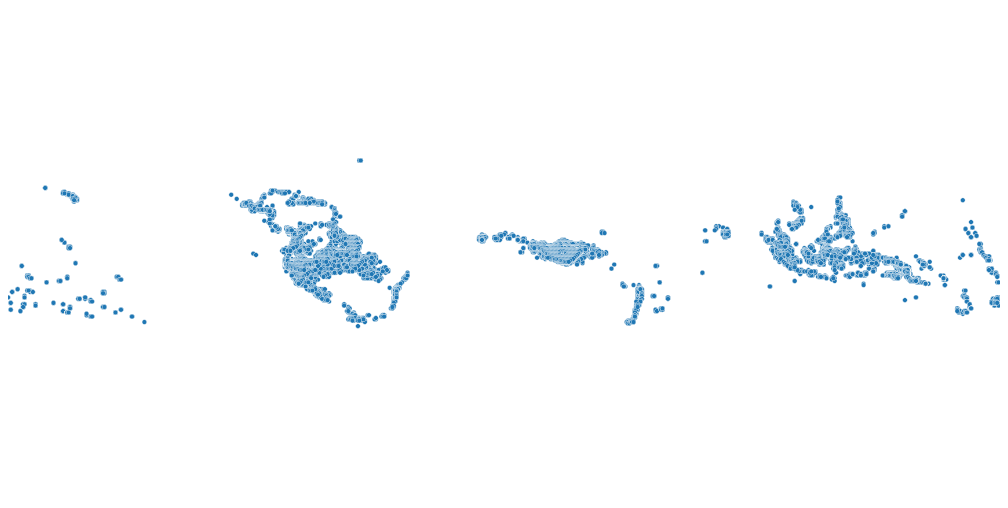

In [135]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=cl_sel,  x=2, y=1,legend=False, palette="mako", size=0.01)
g.axis(xmin=0,xmax=720)
g.axis(ymin=0,ymax=360)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

# Bounding Box - Selection

In [349]:
df['c_lat'] = df['decimalLatitude'].apply(lambda x: int(round(np.interp(x, [-90, 90], [0, 360]))))
df['c_lon']= df['decimalLongitude'].apply(lambda x: int(round(np.interp(x, [-180, 180], [0, 720]))))

In [350]:
lat = 48.210033
lon = 16.363449

In [351]:
c_lat = int(round(np.interp(lat, [-90, 90], [0, 360])))  # check order of values here
c_lon = int(round(np.interp(lon, [-180, 180], [0, 720])))

In [352]:
df[(df['c_lat']==c_lat)&(df['c_lon']==c_lon)]

,Unnamed: 0,index,gbifID,datasetKey,kingdom,phylum,class,order,family,genus,...,b12,b13,b14,b15,b16,b17,b18,b19,c_lat,c_lon
19545,19754,19997,1270028421,7e380070-f762-11e1-a439-00145eb45e9a,Animalia,Arthropoda,Insecta,Diptera,Tephritidae,Chaetorellia,...,-1.100000,19.066668,661.299988,108.700005,191.300003,100.300003,14.333333,19.066668,276,393
32307,32620,33094,1270028299,7e380070-f762-11e1-a439-00145eb45e9a,Animalia,Arthropoda,Insecta,Diptera,Tephritidae,Chaetorellia,...,-1.100000,19.066668,661.299988,108.700005,191.300003,100.300003,14.333333,19.066668,276,393
32785,33104,33591,1270028436,7e380070-f762-11e1-a439-00145eb45e9a,Animalia,Arthropoda,Insecta,Diptera,Tephritidae,Chaetorellia,...,-1.100000,19.066668,661.299988,108.700005,191.300003,100.300003,14.333333,19.066668,276,393
35254,35642,36162,1270028439,7e380070-f762-11e1-a439-00145eb45e9a,Animalia,Arthropoda,Insecta,Diptera,Tephritidae,Chaetorellia,...,-1.100000,19.066668,661.299988,108.700005,191.300003,100.300003,14.333333,19.066668,276,393
49293,49954,50686,1270028335,7e380070-f762-11e1-a439-00145eb45e9a,Animalia,Arthropoda,Insecta,Diptera,Tephritidae,Chaetorellia,...,-1.100000,19.066668,661.299988,108.700005,191.300003,100.300003,14.333333,19.066668,276,393
49469,50130,50869,1270028402,7e380070-f762-11e1-a439-00145eb45e9a,Animalia,Arthropoda,Insecta,Diptera,Tephritidae,Chaetorellia,...,-1.100000,19.066668,661.299988,108.700005,191.300003,100.300003,14.333333,19.066668,276,393
49830,50495,51239,1270028371,7e380070-f762-11e1-a439-00145eb45e9a,Animalia,Arthropoda,Insecta,Diptera,Tephritidae,Chaetorellia,...,-1.100000,19.066668,661.299988,108.700005,191.300003,100.300003,14.333333,19.066668,276,393
50347,51020,51778,1270028416,7e380070-f762-11e1-a439-00145eb45e9a,Animalia,Arthropoda,Insecta,Diptera,Tephritidae,Chaetorellia,...,-1.100000,19.066668,661.299988,108.700005,191.300003,100.300003,14.333333,19.066668,276,393
50568,51244,52011,1270028319,7e380070-f762-11e1-a439-00145eb45e9a,Animalia,Arthropoda,Insecta,Diptera,Tephritidae,Chaetorellia,...,-1.100000,19.066668,661.299988,108.700005,191.300003,100.300003,14.333333,19.066668,276,393
79977,80915,82012,1270028295,7e380070-f762-11e1-a439-00145eb45e9a,Animalia,Arthropoda,Insecta,Diptera,Tephritidae,Chaetorellia,...,-1.100000,19.066668,661.299988,108.700005,191.300003,100.300003,14.333333,19.066668,276,393


# Show Images selected - load images by id -  not implemented yet

In [365]:
## load images
fold_n_thumb = '/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/thumbnails/'
fi_n = os.listdir(fold_n_thumb)
#fi_n.remove('.DS_Store')

image_list = []
for i in range(10):
    im = Image.open(f"/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/thumbnails/{fi_n[i]}")
    image_list.append(im)

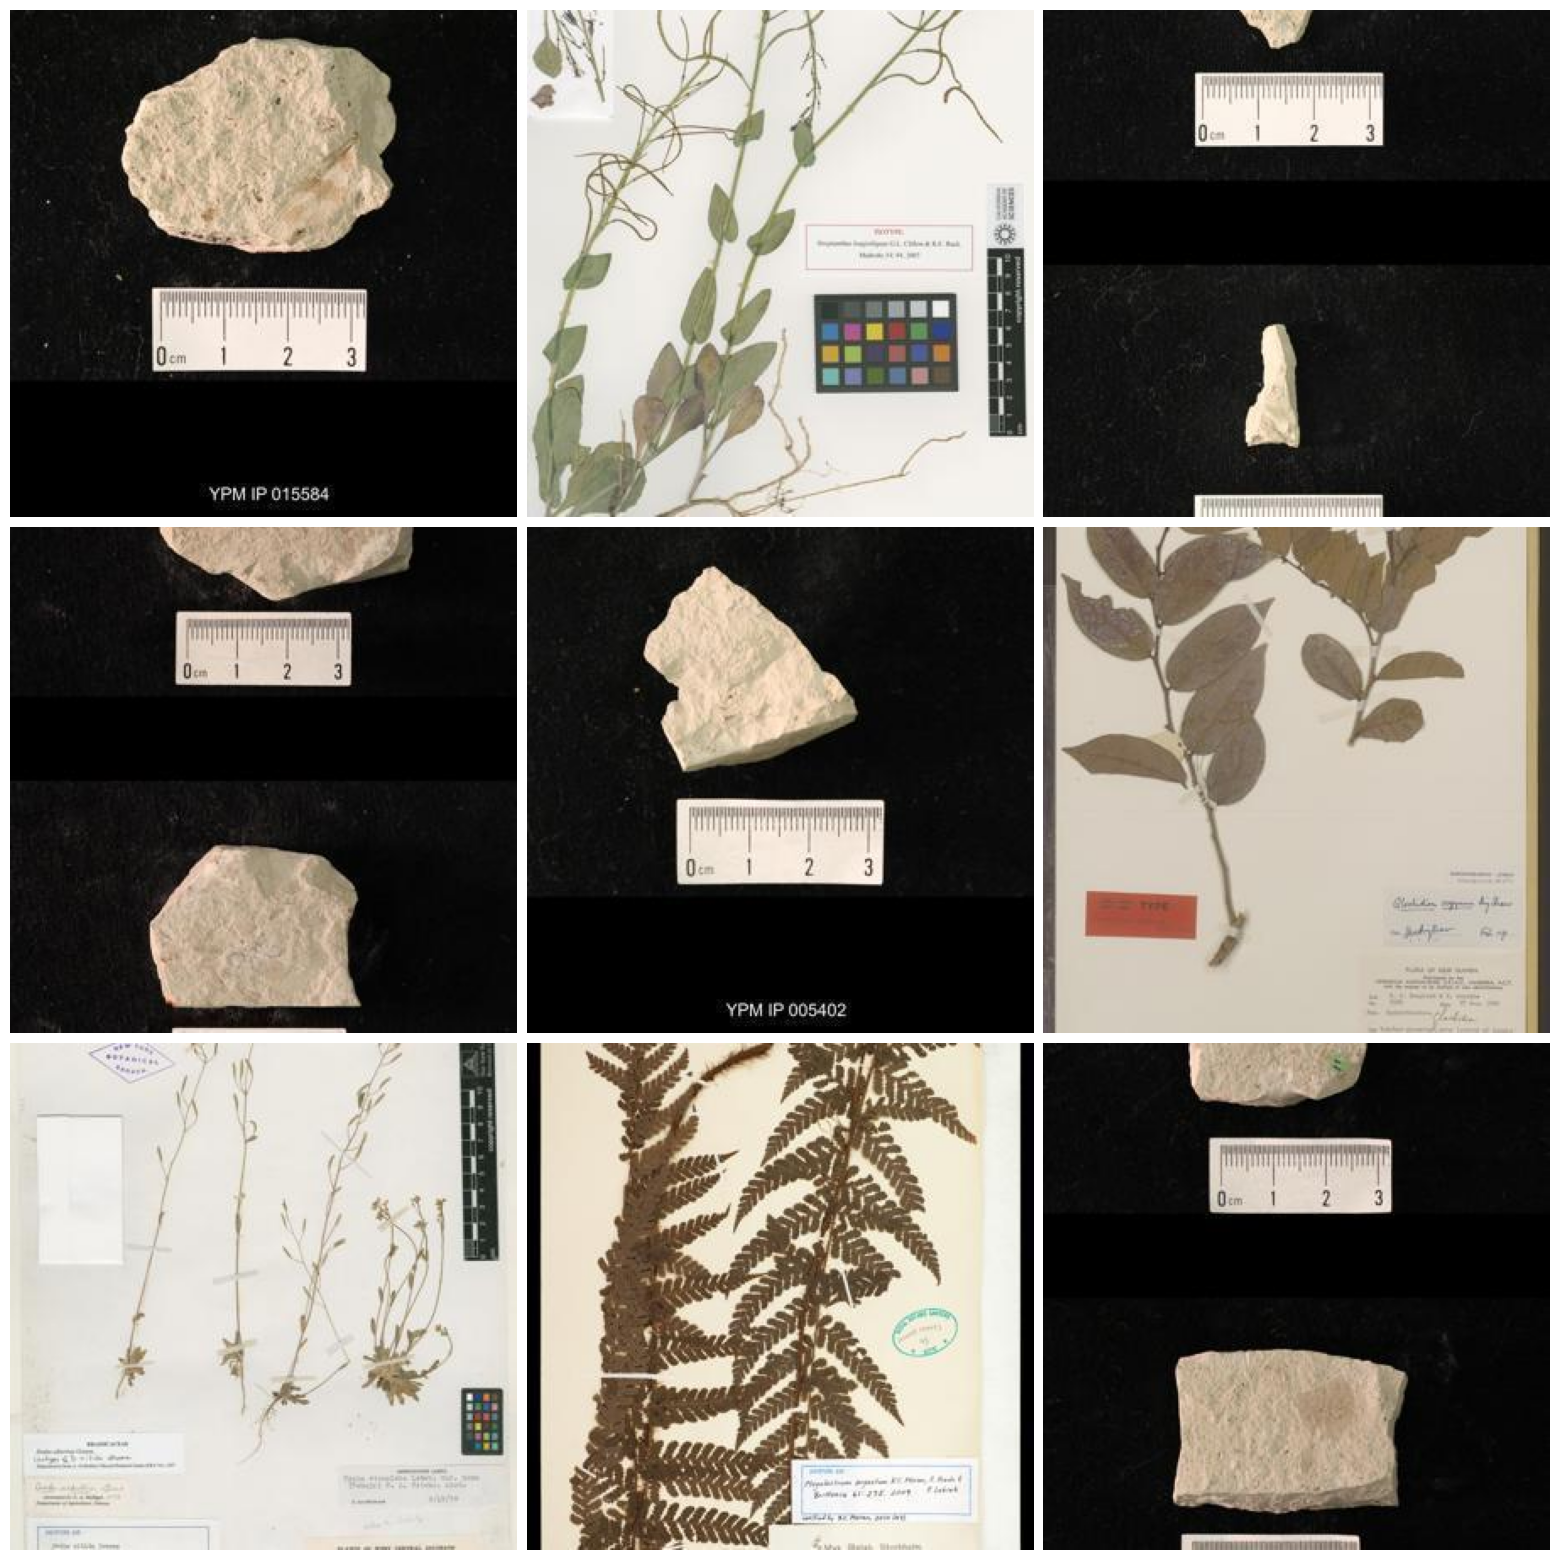

In [374]:
fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, image_list):
    ax.axis("off")
    ax.imshow(im)

plt.show()